In [1]:
pip install -U finance-datareader

     |████████████████████████████████| 48 kB 1.9 MB/s 


In [2]:
import FinanceDataReader as fdr

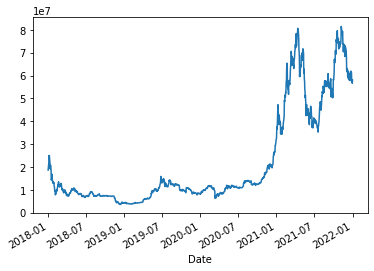

In [4]:
df = fdr.DataReader('BTC/KRW', '2018', '2022')
df['Close'].plot()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import requests
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

In [8]:
df

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-01-01,18655000,19208000,19296000,18362000,10240.0,-0.0288
2018-01-02,19838000,18655000,20800000,18570000,17460.0,0.0634
2018-01-03,20419000,19838000,20810000,19800000,15670.0,0.0293
2018-01-04,21576000,20419000,21830000,19891000,14730.0,0.0567
2018-01-05,25026000,21576000,25988000,21046000,25290.0,0.1599
...,...,...,...,...,...,...
2021-12-28,58278000,61400000,61412000,57900000,600.0,-0.0508
2021-12-29,56989000,58277000,58659000,56590000,1300.0,-0.0221
2021-12-30,57155000,56989000,58198000,56258000,2860.0,0.0029


In [9]:
scaler = MinMaxScaler()
price = scaler.fit_transform(df)[:,0]

In [11]:
price = list(price)

In [12]:
window_size = 3
X = []
Y = []

for i in range(len(price)- window_size):
  X.append([price[i+j] for j in range(window_size)])
  Y.append(price[window_size + i])

In [15]:
X = np.array(X)
Y = np.array(Y)

In [16]:
X.shape

(1457, 3)

In [17]:
Y.shape

(1457,)

In [18]:
train_test_split = 2000

x_train = X[:1100]
y_train = Y[:1100]
x_test = X[1100:]
y_test = Y[1100:]

In [21]:
x_test.shape

(357, 3)

In [23]:
x_train = np.reshape(x_train, (1100, 3, 1))
x_test = np.reshape(x_test, (357, 3, 1))

In [24]:
model = Sequential()
model.add(LSTM(100, input_shape=(3,1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='mse', optimizer='adam')

In [26]:
model.fit(x_train, y_train, epochs=20, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/20
110/110 [==============================] - 4s 12ms/step - loss: 0.0015 - val_loss: 0.0059
Epoch 2/20
110/110 [==============================] - 1s 8ms/step - loss: 1.2852e-04 - val_loss: 0.0046
Epoch 3/20
110/110 [==============================] - 1s 8ms/step - loss: 1.4415e-04 - val_loss: 0.0038
Epoch 4/20
110/110 [==============================] - 1s 6ms/step - loss: 1.3399e-04 - val_loss: 0.0066
Epoch 5/20
110/110 [==============================] - 1s 6ms/step - loss: 1.2126e-04 - val_loss: 0.0149
Epoch 6/20
110/110 [==============================] - 1s 6ms/step - loss: 1.3752e-04 - val_loss: 0.0150
Epoch 7/20
110/110 [==============================] - 1s 7ms/step - loss: 1.1054e-04 - val_loss: 0.0132
Epoch 8/20
110/110 [==============================] - 1s 7ms/step - loss: 1.1873e-04 - val_loss: 0.0105
Epoch 9/20
110/110 [==============================] - 1s 8ms/step - loss: 1.3031e-04 - val_loss: 0.0097
Epoch 10/20
110/110 [==============================] - 1s 8ms/step 

In [28]:
x_train_pred = model.predict(x_train)
x_test_pred = model.predict(x_test)

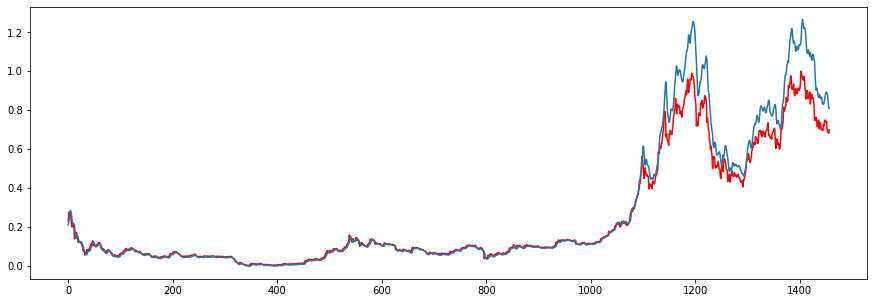

In [29]:
plt.figure(figsize=(15,5))

plt.plot(np.concatenate((y_train, y_test), axis=0), c='r')
plt.plot(np.concatenate((x_train_pred, x_test_pred), axis=0))

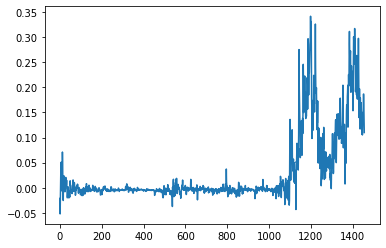

In [32]:
plt.plot(-(np.concatenate((y_train, y_test), axis=0) - np.concatenate((x_train_pred, x_test_pred), axis=0)[:,0]))

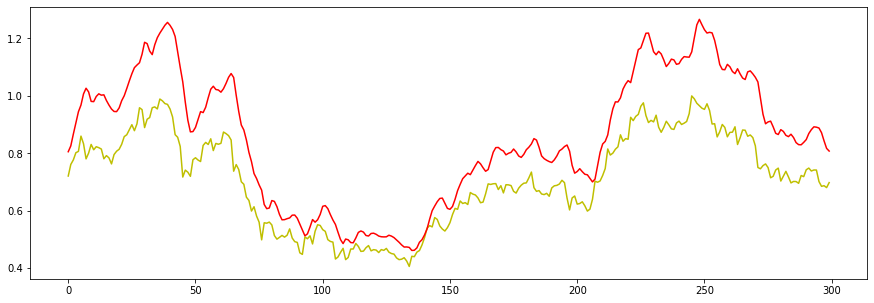

In [30]:
plt.figure(figsize=(15,5))

plt.plot(price[-300:], c='y')
plt.plot(x_test_pred[-300:], c='r')